# Sources
1. https://www.kaggle.com/code/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy
2. https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/#How_to_decide_which_imputation_technique_to_use
3. https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
4. https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html
5. https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/
6. https://www.kaggle.com/tonzowonzo/simple-k-means-clustering-on-the-iris-dataset
7. https://github.com/rasbt/stat479-machine-learning-fs18/blob/master/02_knn/02_knn_demo.ipynb
8. https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial
9. https://www.kaggle.com/code/prashant111/svm-classifier-tutorial#16.-Confusion-matrix-

# Define the Problem
The iris dataset contains measurements of the sepal length, sepal width, petal length, and petal width of three different species of iris flowers: setosa, versicolor, and virginica. The goal of this project is to build a machine learning model that can accurately classify the species of iris flowers based on these measurements.

The dataset provided contains measurements of three iris flowers, one from each species: setosa, versicolor, and virginica. The goal of this project is to use these measurements to predict the species of each iris flower.

The model will be trained on a labeled dataset of iris measurements, and its performance will be evaluated on a separate test dataset. The accuracy of the model will be measured using the classification accuracy metric, which is the proportion of correctly classified instances out of the total number of instances.

The final model will be used to predict the species of iris flowers based on new measurements of sepal length, sepal width, petal length, and petal width.

🤖 prompt: can you create a problem statement for this data set: Iris\_with\_outliers.csv

# Import Libraries

In [29]:
#Common Model Algorithms
from sklearn import tree, neighbors
from sklearn.cluster import KMeans, DBSCAN
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

#Common Helpers
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score, mean_absolute_error, classification_report, explained_variance_score, confusion_matrix, roc_curve, roc_auc_score, adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score
import numpy as np

#Visualization
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Configure Visualization Defaults
# %matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

# Gather the Data
https://www.kaggle.com/datasets/uciml/iris?select=Iris.csv

I have added some additional data points that contain outliers, and faulty data.

In [ ]:
iris = pd.read_csv('Iris_with_outliers.csv')

# Meet, Greet, and Eat the Data

Because all of the data has been provided to us in `.csv` format through Kaggle, there is no need to perform the usual steps of data wrangling (architecture, governcance, and extraction)

## Preview data

In [31]:
iris.info()
iris.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     173 non-null    int64  
 1   Id             173 non-null    int64  
 2   SepalLengthCm  170 non-null    float64
 3   SepalWidthCm   172 non-null    float64
 4   PetalLengthCm  169 non-null    float64
 5   PetalWidthCm   171 non-null    float64
 6   Species        173 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.6+ KB


,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,173.000000,173.000000,170.000000,172.000000,169.000000,171.000000,173
unique,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,NaN,61
mean,86.000000,86.000000,5.834118,3.068605,3.718935,1.171345,NaN
std,50.084928,50.084928,0.844972,0.444922,1.778207,0.763774,NaN
min,0.000000,0.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,43.000000,43.000000,5.100000,2.800000,1.500000,0.300000,NaN
50%,86.000000,86.000000,5.800000,3.000000,4.300000,1.300000,NaN
75%,129.000000,129.000000,6.400000,3.400000,5.100000,1.800000,NaN


We may have spotted that there are some outliers within the data, for example, the max value for the petal length is 6.9, while the mean is 3.71. We don't know whether this is unreasonable value, so we will check again using scatter plots to get more information.

## Remove unvaluable columns
`Unnamed: 0` and `Id` are not valuable for our analysis, so we will remove them from the dataset.

In [32]:
# `Unnamed: 0` and `Id` are not valuable for our analysis, so we will remove them from the dataset.
drop_column = ['Unnamed: 0','Id']
iris.drop(drop_column, axis=1, inplace = True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.7,3.2,1.6,0.2,Iris-setosa
2,4.9,3.1,1.5,0.1,Iris-setosa
3,4.4,2.9,1.4,0.2,Iris-setosa
4,5.0,3.4,1.5,0.2,Iris-setosa


## Check for missing data

In [33]:
# check for null and missing values
print('columns with NULL values: \n', iris.isnull().sum())
print("-"*10)
print('columns with NaN values: \n', iris.isna().sum())
print (iris.info())
print("-"*10)

columns with NULL values: 
 SepalLengthCm    3
SepalWidthCm     1
PetalLengthCm    4
PetalWidthCm     2
Species          0
dtype: int64
----------
columns with NaN values: 
 SepalLengthCm    3
SepalWidthCm     1
PetalLengthCm    4
PetalWidthCm     2
Species          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  170 non-null    float64
 1   SepalWidthCm   172 non-null    float64
 2   PetalLengthCm  169 non-null    float64
 3   PetalWidthCm   171 non-null    float64
 4   Species        173 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB
None
----------


Because our data set contains a total of 173 rows, we can say that the missing values are not significant enough to use advanced imputation methods.

## Check Unique Value Count

In [34]:
iris.nunique()

SepalLengthCm    36
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

There are many unique values, so we will not be using mode for imputation. Mode imputation is suitable for categorical variables or numerical variables with a small number of unique values. 

## Determine imputation technique

/Users/koski/anaconda3/envs/bootcamp/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


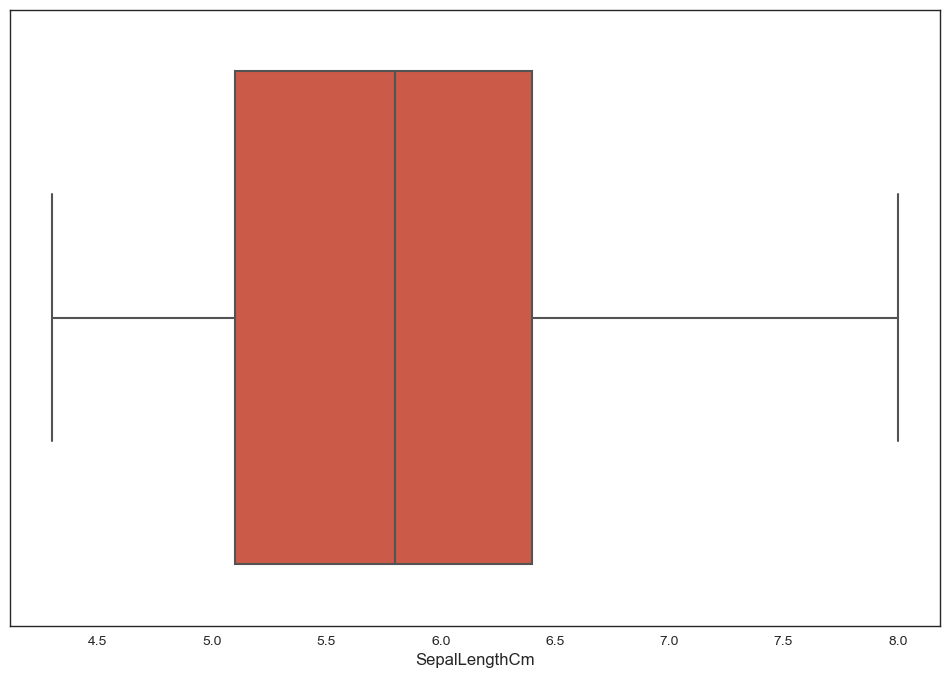

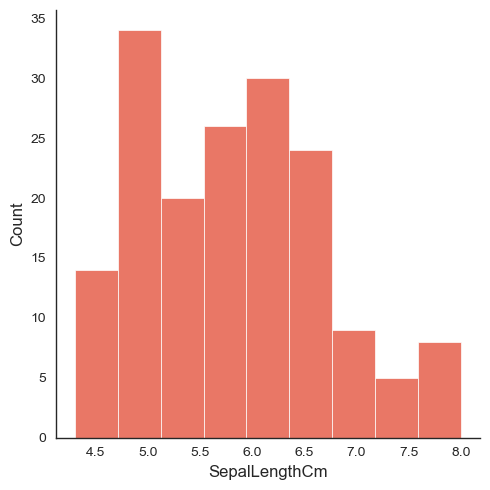

In [35]:
sns.boxplot(x=iris['SepalLengthCm'])
sns.displot(x=iris['SepalLengthCm'])

Looking at the boxplot, there is no outlying data point on either side. Also it does not look skewed in any direction. Therefore we will use **mean** imputation.

/Users/koski/anaconda3/envs/bootcamp/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


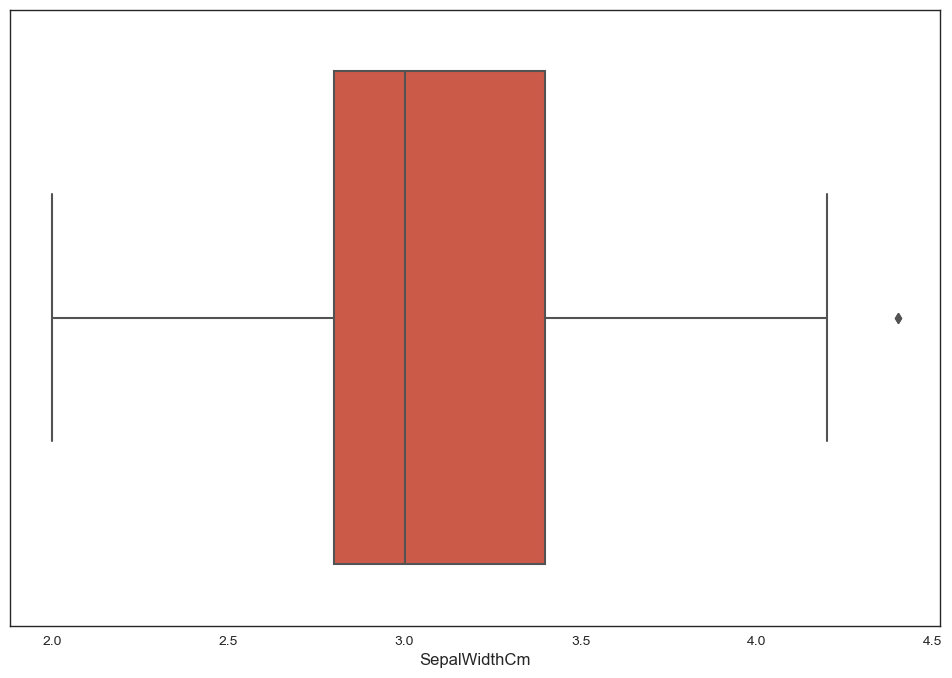

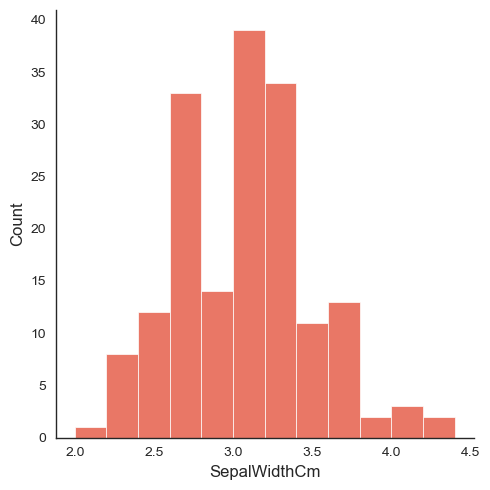

In [36]:
sns.boxplot(x=iris['SepalWidthCm'])
sns.displot(x=iris['SepalWidthCm'])

Looking at the boxplot, there is no considerable outlying data points on either side. Also it does not look skewed in any direction. Therefore we will use **mean** imputation.

/Users/koski/anaconda3/envs/bootcamp/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


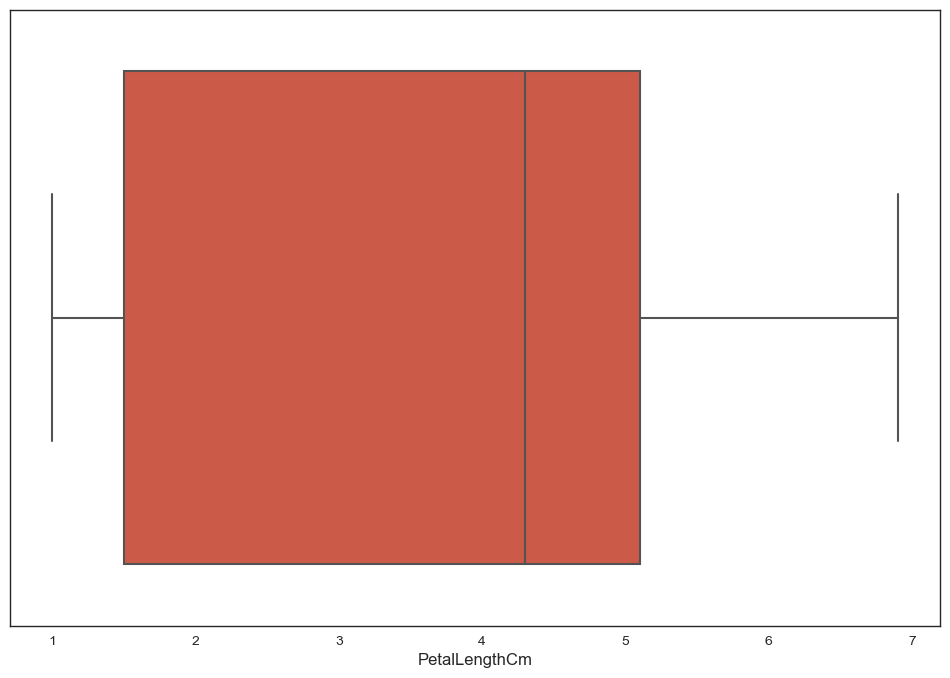

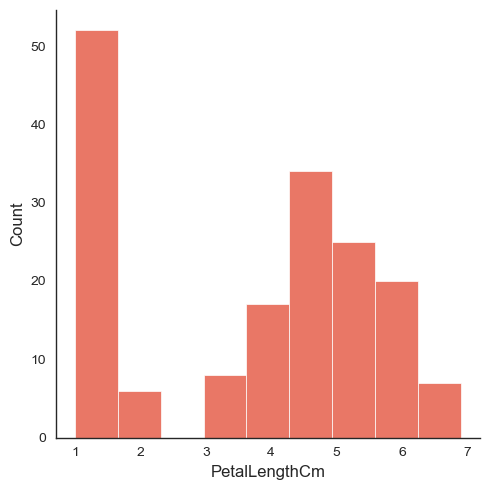

In [37]:
sns.boxplot(x=iris['PetalLengthCm'])
sns.displot(x=iris['PetalLengthCm'])

Looking at the boxplot, there is no considerable outlying data points on either side. By looking at the histogram we can see that it is right skewed. Therefore we will use **median** imputation.

/Users/koski/anaconda3/envs/bootcamp/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


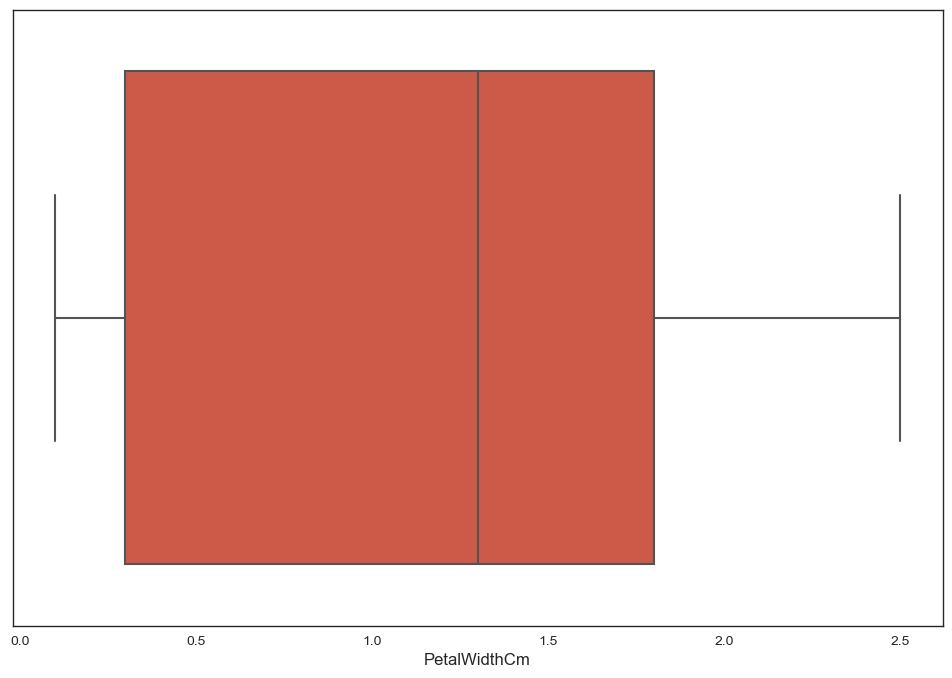

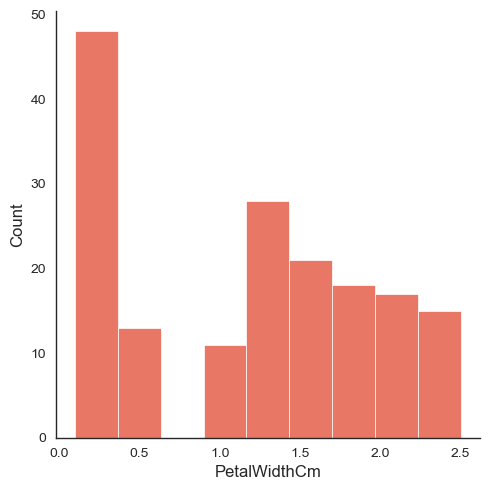

In [38]:
sns.boxplot(x=iris['PetalWidthCm'])
sns.displot(x=iris['PetalWidthCm'])

Looking at the boxplot, there is no considerable outlying data points on either side. By looking at the histogram we can see that it is right skewed. Therefore we will use **median** imputation. 

## Impute Missing Values

In [39]:
# impute the missing values using SkLearn
from sklearn.impute import SimpleImputer

# impute the SepalLengthCm and SepalWidthCm with mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer = imputer.fit(iris[['SepalLengthCm', 'SepalWidthCm']])
iris[['SepalLengthCm', 'SepalWidthCm']] = imputer.transform(iris[['SepalLengthCm', 'SepalWidthCm']])

# impute the PetalLengthCm and PetalWidthCm with median
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

imputer = imputer.fit(iris[['PetalLengthCm', 'PetalWidthCm']])
iris[['PetalLengthCm', 'PetalWidthCm']] = imputer.transform(iris[['PetalLengthCm', 'PetalWidthCm']])

print('columns with NULL values: \n', iris.isnull().sum())
print('columns with NaN values: \n', iris.isna().sum())
print("-"*10)
print (iris.info())
print("-"*10)

iris.describe(include = 'all')

columns with NULL values: 
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
columns with NaN values: 
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  173 non-null    float64
 1   SepalWidthCm   173 non-null    float64
 2   PetalLengthCm  173 non-null    float64
 3   PetalWidthCm   173 non-null    float64
 4   Species        173 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB
None
----------


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,173.000000,173.000000,173.00000,173.000000,173
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,61
mean,5.834118,3.068605,3.73237,1.172832,NaN
std,0.837570,0.443627,1.75959,0.759446,NaN
min,4.300000,2.000000,1.00000,0.100000,NaN
25%,5.100000,2.800000,1.50000,0.300000,NaN
50%,5.800000,3.000000,4.30000,1.300000,NaN
75%,6.400000,3.400000,5.10000,1.800000,NaN


## Find & Remove Outliers

In [40]:
def get_outliers(data, column):
    """
    Computes the upper and lower bounds for a given column of a DataFrame based on the interquartile range (IQR).

    Parameters:
    data (pandas.DataFrame): The DataFrame containing the data.
    column (str): The name of the column for which to compute the bounds.

    Returns:
    tuple: A tuple of two DataFrames containing the data points that are above the upper bound and below the lower bound, respectively.
    """

    # Compute IQR
    Q1 = np.percentile(data[column], 25, method='midpoint')
    Q3 = np.percentile(data[column], 75, method='midpoint')
    IQR = Q3 - Q1

    # Compute upper and lower bounds
    upper = Q3 + 1.5 * IQR
    upper_outliers = np.where(data[column]>=upper)[0]

    lower = Q1 - 1.5 * IQR
    lower_outliers = np.where(data[column]<=lower)[0]

    return (upper_outliers, lower_outliers)

In [41]:
# all columns but "Species"
columns = iris.columns[:-1]

for column in columns:
    upper_outliers, lower_outliers = get_outliers(iris, column)
    print("-"*10)
    print(f'upper outliers for {column}: \n', upper_outliers)
    print("-"*10)
    print(f'lower outliers for {column}: \n', lower_outliers)
    print("-"*10)
    
    iris.drop(upper_outliers, inplace=True)
    iris.drop(lower_outliers, inplace=True)
    
iris.shape

----------
upper outliers for SepalLengthCm: 
 []
----------
lower outliers for SepalLengthCm: 
 []
----------
----------
upper outliers for SepalWidthCm: 
 [56 91]
----------
lower outliers for SepalWidthCm: 
 []
----------
----------
upper outliers for PetalLengthCm: 
 []
----------
lower outliers for PetalLengthCm: 
 []
----------
----------
upper outliers for PetalWidthCm: 
 []
----------
lower outliers for PetalWidthCm: 
 []
----------


(171, 5)

With the code above we have managed to find the outliers in our dataset, `SepalWidthCm` has two outlying values. Which we have removed from the dataset. As we an see by the shape property, we have removed two rows from the dataset (outliers)

## Convert formats

In [42]:
# we use the label encoder because we only want to encode the target variable. 
label = LabelEncoder()

iris['Species'] = label.fit_transform(iris['Species'])

## Verify Preprocessed Data

In [43]:
print('columns with null values: \n', iris.isnull().sum())
print("-"*10)
print (iris.info())
print("-"*10)

iris.describe(include = 'all')

columns with null values: 
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
Index: 171 entries, 0 to 172
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  171 non-null    float64
 1   SepalWidthCm   171 non-null    float64
 2   PetalLengthCm  171 non-null    float64
 3   PetalWidthCm   171 non-null    float64
 4   Species        171 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 8.0 KB
None
----------


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,171.000000,171.000000,171.000000,171.000000,171.000000
mean,5.835686,3.053033,3.758480,1.181871,0.982456
std,0.842356,0.421927,1.753073,0.759233,0.829413
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.350000,5.100000,1.800000,2.000000
max,8.000000,4.200000,6.900000,2.500000,2.000000


# Explore the Data (EDA)

In [44]:
iris.iloc[:].corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.102604,0.845215,0.789652,0.742082
SepalWidthCm,-0.102604,1.000000,-0.362230,-0.325891,-0.368278
PetalLengthCm,0.845215,-0.362230,1.000000,0.926781,0.894377
PetalWidthCm,0.789652,-0.325891,0.926781,1.000000,0.898121
Species,0.742082,-0.368278,0.894377,0.898121,1.000000


# Model Data

We use cross validation using the LeaveOneOut scheme, because we have a small dataset. LeaveOneOut is a scheme where each observation is used as a validation set once, and the rest are used as the training set. Meaning that we have 171 training sets and 171 validation sets. Taking the mean of all the scores gives us the final score.

This method is computationally expensive, but it is the best way to get an accurate score. With our small model size we can afford to use this method.   

## Binary Classification
**Type:** Supervised Learning     
**Goal:** Classify data into one of two classes, e.g. yes or no, true or false, or 0 or 1.

### Decision Tree

#### Model Features and Target

In [45]:
X = iris.drop('Species', axis=1)
y = iris['Species']

# Convert the target variable to a binary classification problem
y_binary = (y == 0).astype(int)  # 1 if Iris Setosa, 0 otherwise

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

#### Hyperparameter Tuning

In [46]:
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4], 
    'max_leaf_nodes': [2, 4, 6, 8],
}

clf = tree.DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'max_depth': 4, 'max_leaf_nodes': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


#### Model Training

In [47]:
clf = tree.DecisionTreeClassifier(random_state=42, max_depth= 4, max_leaf_nodes= 4, min_samples_leaf= 1, min_samples_split= 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#### Model Evaluation

In [48]:
clf_scores = cross_val_score(clf, X, y, cv=LeaveOneOut())
print("Decision Tree Accuracy: %0.2f" % (clf_scores.mean()))

Decision Tree Accuracy: 0.91



True Positives(TP) =  20

True Negatives(TN) =  14

False Positives(FP) =  1

False Negatives(FN) =  0


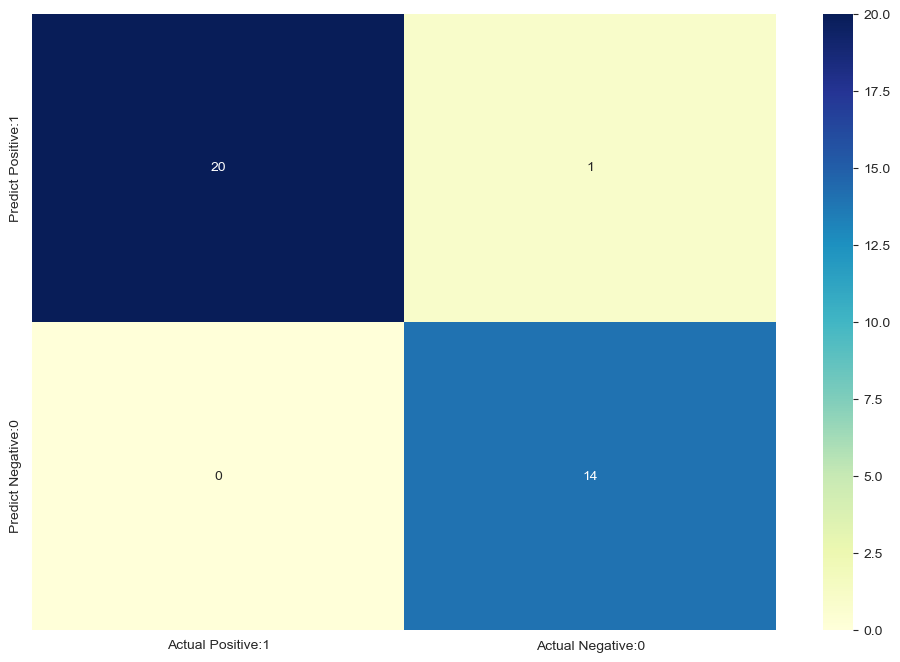

In [49]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

print('\nTrue Positives(TP) = ', TP)
print('\nTrue Negatives(TN) = ', TN)
print('\nFalse Positives(FP) = ', FP)
print('\nFalse Negatives(FN) = ', FN)

The confusion matrix shows 20 + 14 = 34 correct predictions and 1 + 0 = 1 incorrect predictions.

In this case we have
- True Positives: (Actual Positive:1 and Predict Positive:1): 20
- True Negatives: (Actual Negative:0 and Predict Negative:0): 14
- False Positives: (Actual Negative:0 but Predict Positive:1): 1
- False Negatives: (Actual Positive:1 but Predict Negative:0): 0

In [50]:
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.93      1.00      0.97        14

    accuracy                           0.97        35
   macro avg       0.97      0.98      0.97        35
weighted avg       0.97      0.97      0.97        35



**Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.**   
_precision = TP / float(TP + FP)_
- The 0 (false) value has a precision of 1.00
- The 1 (true) value has a precision of 0.93

This means that the model is very good at predicting false values, but not as good at predicting true values.

**Recall is the ratio of correctly predicted positive observations to the all observations in actual class.**   
_recall = TP / float(TP + FN)_
- The 0 (false) value has a recall of 0.95
- The 1 (true) value has a recall of 1.00

This means that the model is very good at predicting true values, but not as good at predicting false values.

**F1 Score is the weighted average of Precision and Recall.**
- The 0 (false) value has a F1 score of 0.98
- The 1 (true) value has a F1 score of 0.97

This means that the model is very good at predicting false values, but not as good at predicting true values.

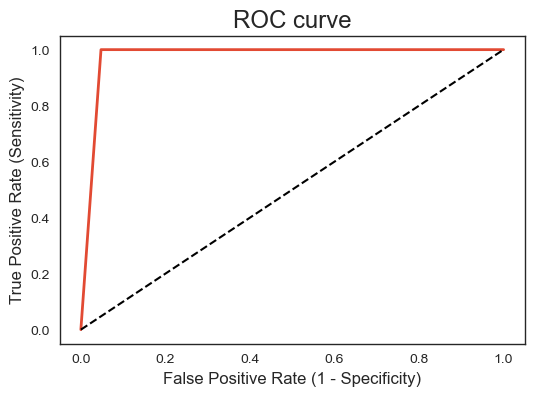

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

We will use the ROC AUC to calculate the performance of the model. The ROC AUC is the area under the ROC curve. The ROC curve is a plot of the true positive rate (TPR) against the false positive rate (FPR). 

The ROC AUC is a measure of how well a model can distinguish between classes. An area of 1 represents a perfect classification; an area of .5 represents a worthless classication.

In [52]:
ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9762


The ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in classifying the result.

[Text(0.3333333333333333, 0.875, 'PetalWidthCm <= 0.45\ngini = 0.448\nsamples = 136\nvalue = [90, 46]\nclass = 0'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 42\nvalue = [0, 42]\nclass = 1'),
 Text(0.5, 0.625, 'PetalLengthCm <= 2.3\ngini = 0.081\nsamples = 94\nvalue = [90, 4]\nclass = 0'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1'),
 Text(0.6666666666666666, 0.375, 'SepalWidthCm <= 2.95\ngini = 0.043\nsamples = 92\nvalue = [90, 2]\nclass = 0'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 49\nvalue = [49, 0]\nclass = 0'),
 Text(0.8333333333333334, 0.125, 'gini = 0.089\nsamples = 43\nvalue = [41, 2]\nclass = 0')]

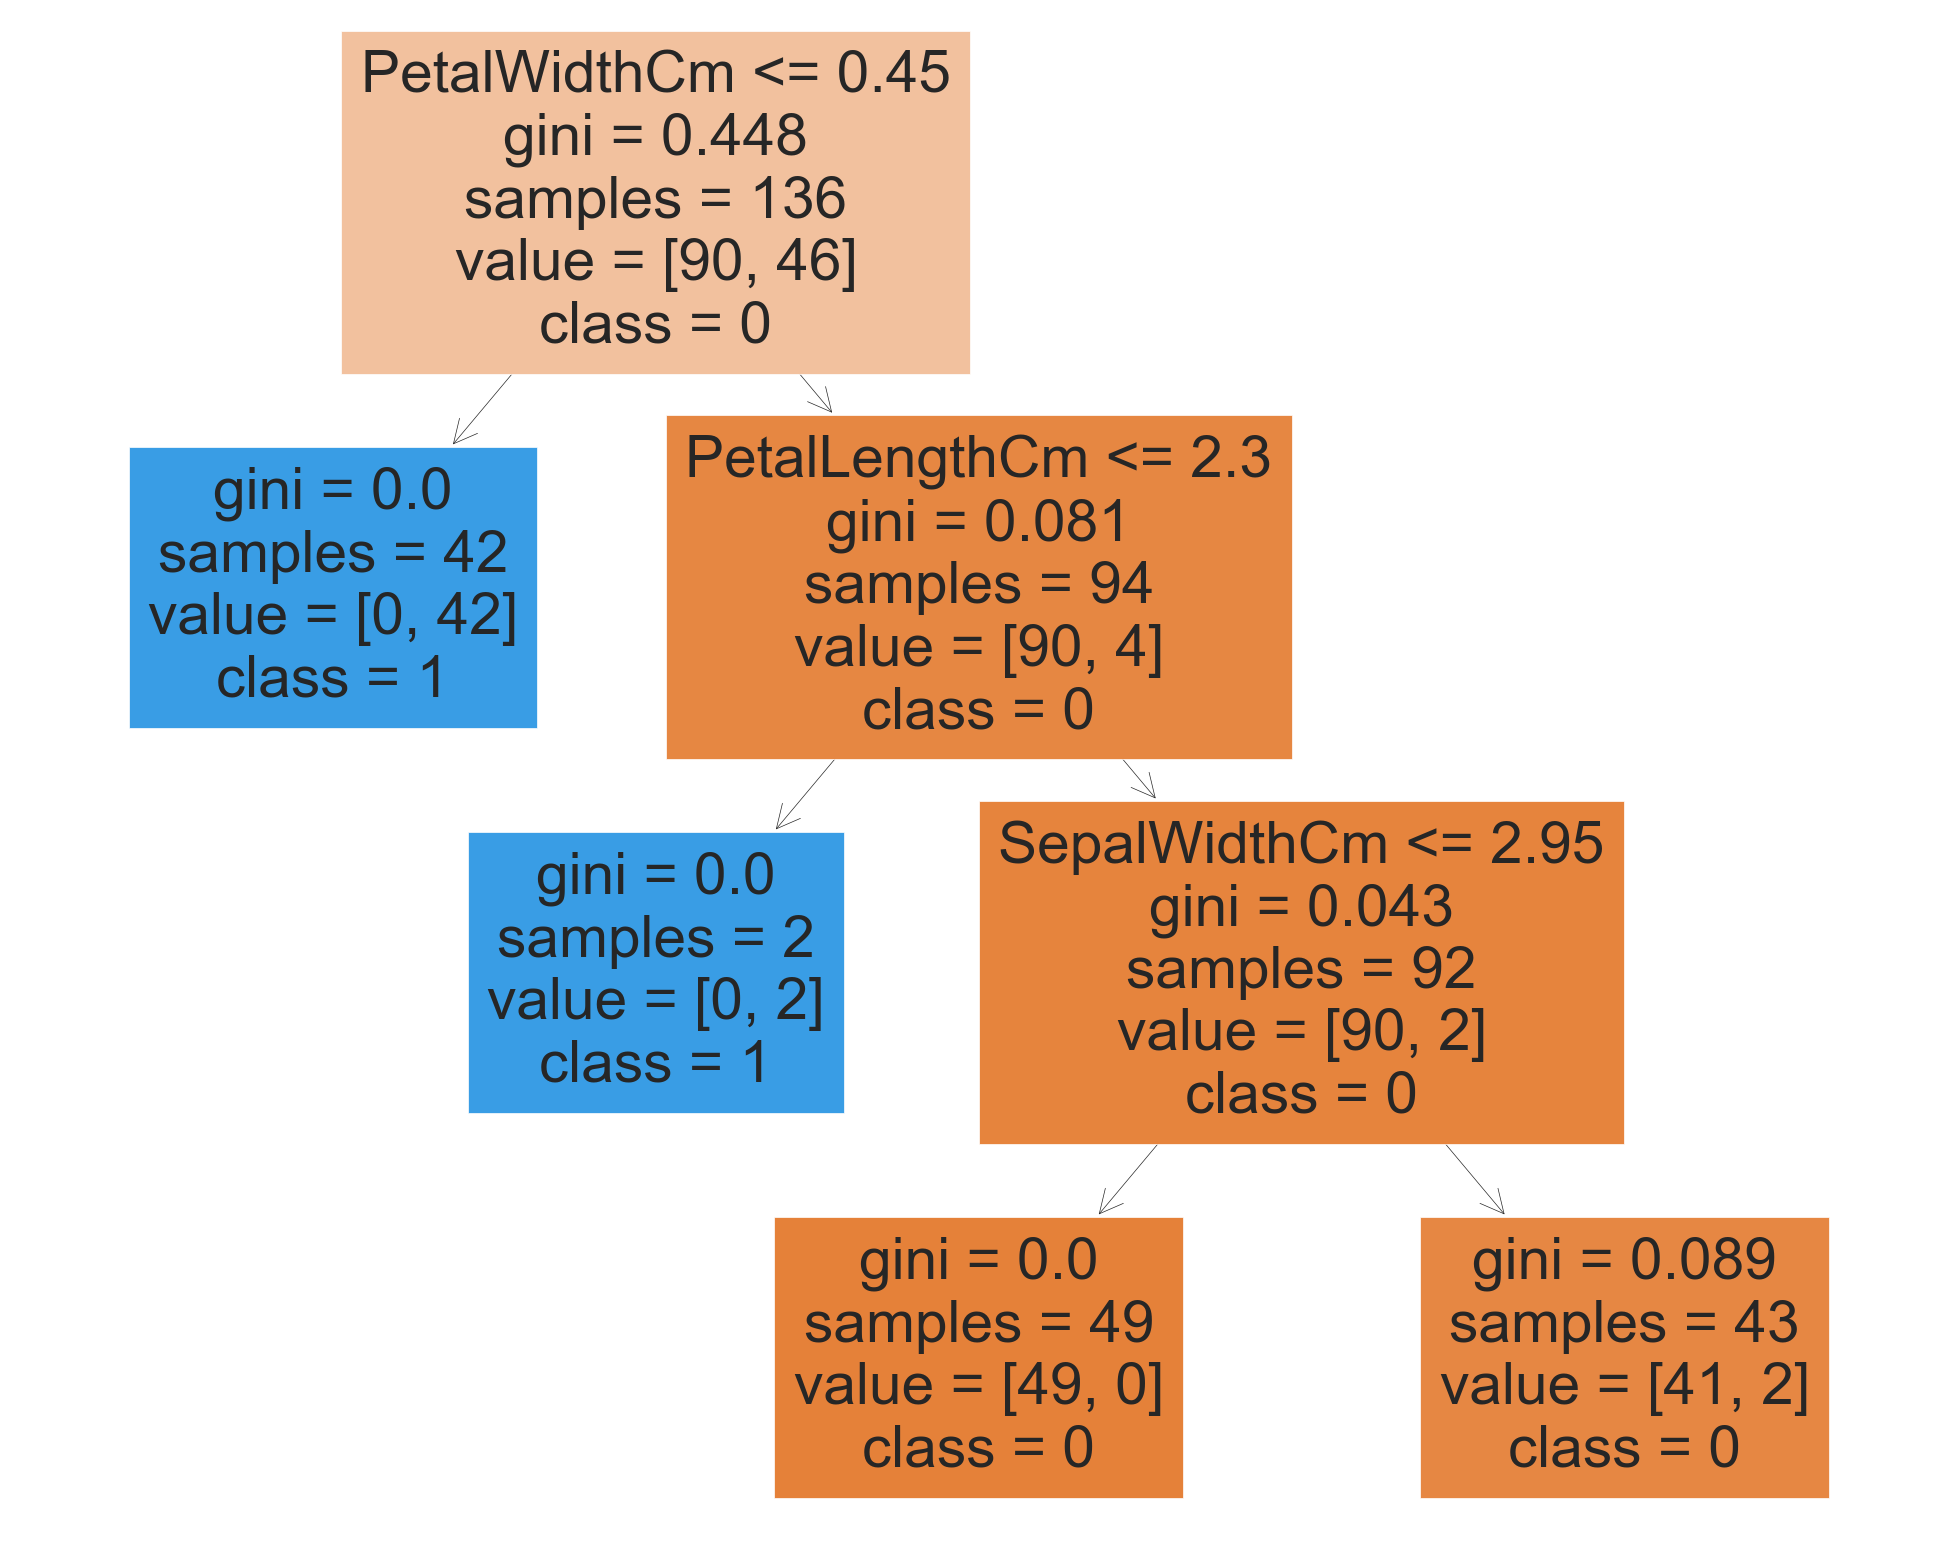

In [53]:
fig = plt.figure(figsize=(25, 20))
tree.plot_tree(clf, 
                feature_names=X.columns.tolist(),  
                class_names=[str(c) for c in y.unique().tolist()],
                filled=True
                )

By looking at the tree we can see that the most important feature is `PetalWidthCm`. This is also the feature with the highest correlation with the target variable according to the correlation matrix (0.898). The second most important feature is `PetalLengthCm`, which is also the second highest correlated feature (0.894).

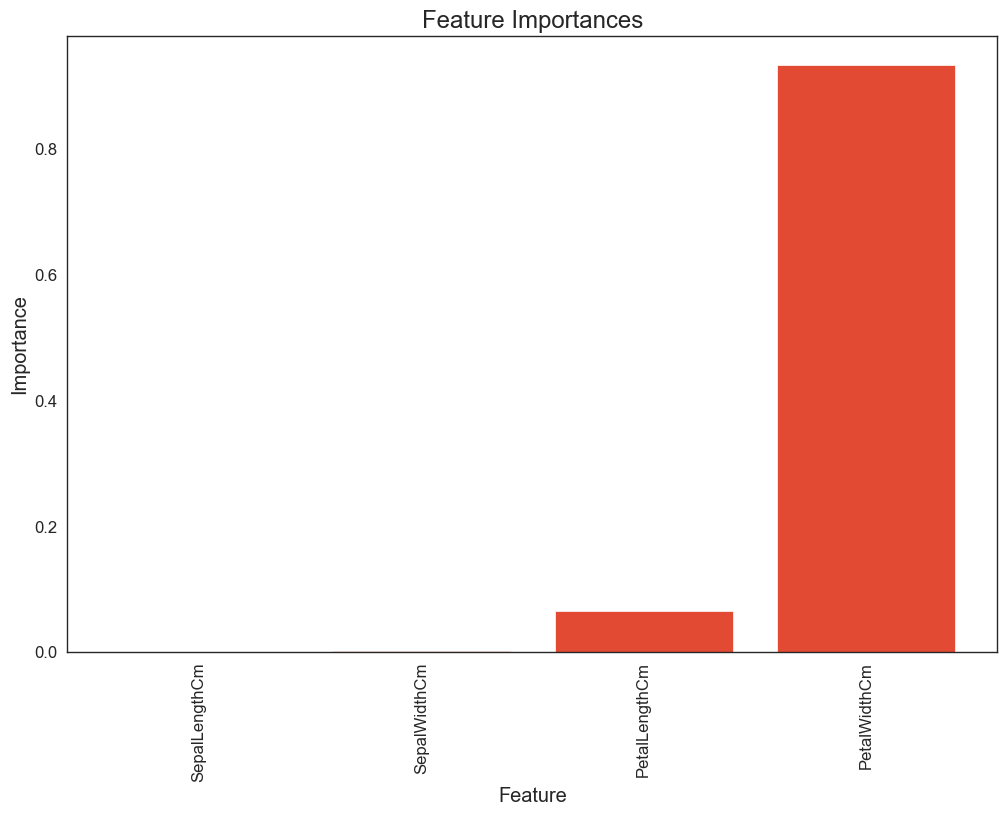

In [54]:
feature_importances = clf.feature_importances_
feature_names = X_train.columns.tolist()
plt.bar(feature_names, feature_importances)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

By looking at this barchart we indeed can also see that the most important features are the `PetalLengthCm` and `PetalWidthCm`. If we would want to improve our model, we should remove the SepalLengthCm and SepalWidthCm features from our feature set. What we could also try is to only use the `PetalWidthCm` features to train our model.

### Gradient Boosting Machine (GBM)

#### Model Features and Target

In [55]:
X = iris.drop('Species', axis=1)
y = iris['Species']

# Convert the target variable to a binary classification problem
y_binary = (y == 0).astype(int)  # 1 if Iris Setosa, 0 otherwise

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

#### Hyperparameter Tuning

In [56]:
# 🤖 prompt: optimze hyperparameters for model in Python
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4], 
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3], 
}

gbm = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gbm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4}


#### Model Training

In [57]:
gbm = GradientBoostingClassifier(random_state=42, max_depth=2, min_samples_split=2, learning_rate=0.01)

gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)

#### Model Evaluation

In [58]:
gbm_scores = cross_val_score(gbm, X, y, cv=LeaveOneOut())
print("Gradient Boosting Machine Accuracy: %0.2f" % (gbm_scores.mean()))

Gradient Boosting Machine Accuracy: 0.93



True Positives(TP) =  20

True Negatives(TN) =  14

False Positives(FP) =  1

False Negatives(FN) =  0


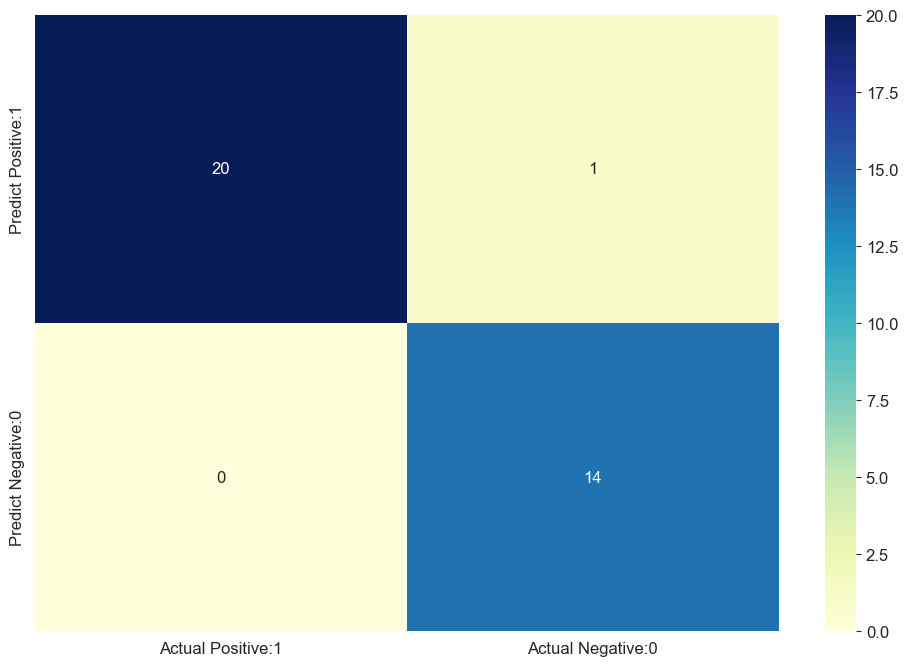

In [59]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

print('\nTrue Positives(TP) = ', TP)
print('\nTrue Negatives(TN) = ', TN)
print('\nFalse Positives(FP) = ', FP)
print('\nFalse Negatives(FN) = ', FN)

The confusion matrix shows 19 + 14 = 33 correct predictions and 0 + 2 = 2 incorrect predictions.

In this case we have
- True Positives: (Actual Positive:1 and Predict Positive:1): 19
- True Negatives: (Actual Negative:0 and Predict Negative:0): 14
- False Positives: (Actual Negative:0 but Predict Positive:1): 2
- False Negatives: (Actual Positive:1 but Predict Negative:0): 0

In [60]:
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.93      1.00      0.97        14

    accuracy                           0.97        35
   macro avg       0.97      0.98      0.97        35
weighted avg       0.97      0.97      0.97        35



**Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.**   
_precision = TP / float(TP + FP)_
- The 0 (false) value has a precision of 1.00
- The 1 (true) value has a precision of 0.88

This means that the model is very good at predicting false values, but not as good at predicting true values.

**Recall is the ratio of correctly predicted positive observations to the all observations in actual class.**   
_recall = TP / float(TP + FN)_
- The 0 (false) value has a recall of 0.90
- The 1 (true) value has a recall of 1.00

This means that the model is very good at predicting false values, but not as good at predicting true values.

**F1 Score is the weighted average of Precision and Recall.**
- The 0 (false) value has a F1 score of 0.95
- The 1 (true) value has a F1 score of 0.93

This means that the model is very good at predicting false values, but not as good at predicting true values.

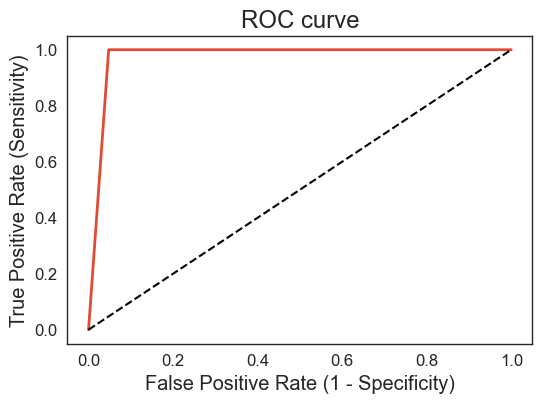

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

We will use the ROC AUC to calculate the performance of the model. The ROC AUC is the area under the ROC curve. The ROC curve is a plot of the true positive rate (TPR) against the false positive rate (FPR). 

The ROC AUC is a measure of how well a model can distinguish between classes. An area of 1 represents a perfect classification; an area of .5 represents a worthless classication.

In [62]:
ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9762


The ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in classifying the result.

[Text(0.5, 0.8333333333333334, 'PetalWidthCm <= 0.45\nfriedman_mse = 0.224\nsamples = 136\nvalue = -0.0'),
 Text(0.25, 0.5, 'SepalLengthCm <= 5.05\nfriedman_mse = 0.0\nsamples = 42\nvalue = 0.662'),
 Text(0.125, 0.16666666666666666, 'friedman_mse = -0.0\nsamples = 23\nvalue = 2.957'),
 Text(0.375, 0.16666666666666666, 'friedman_mse = 0.0\nsamples = 19\nvalue = 2.957'),
 Text(0.75, 0.5, 'PetalLengthCm <= 2.3\nfriedman_mse = 0.041\nsamples = 94\nvalue = -0.296'),
 Text(0.625, 0.16666666666666666, 'friedman_mse = 0.0\nsamples = 2\nvalue = 2.957'),
 Text(0.875, 0.16666666666666666, 'friedman_mse = 0.021\nsamples = 92\nvalue = -1.414')]

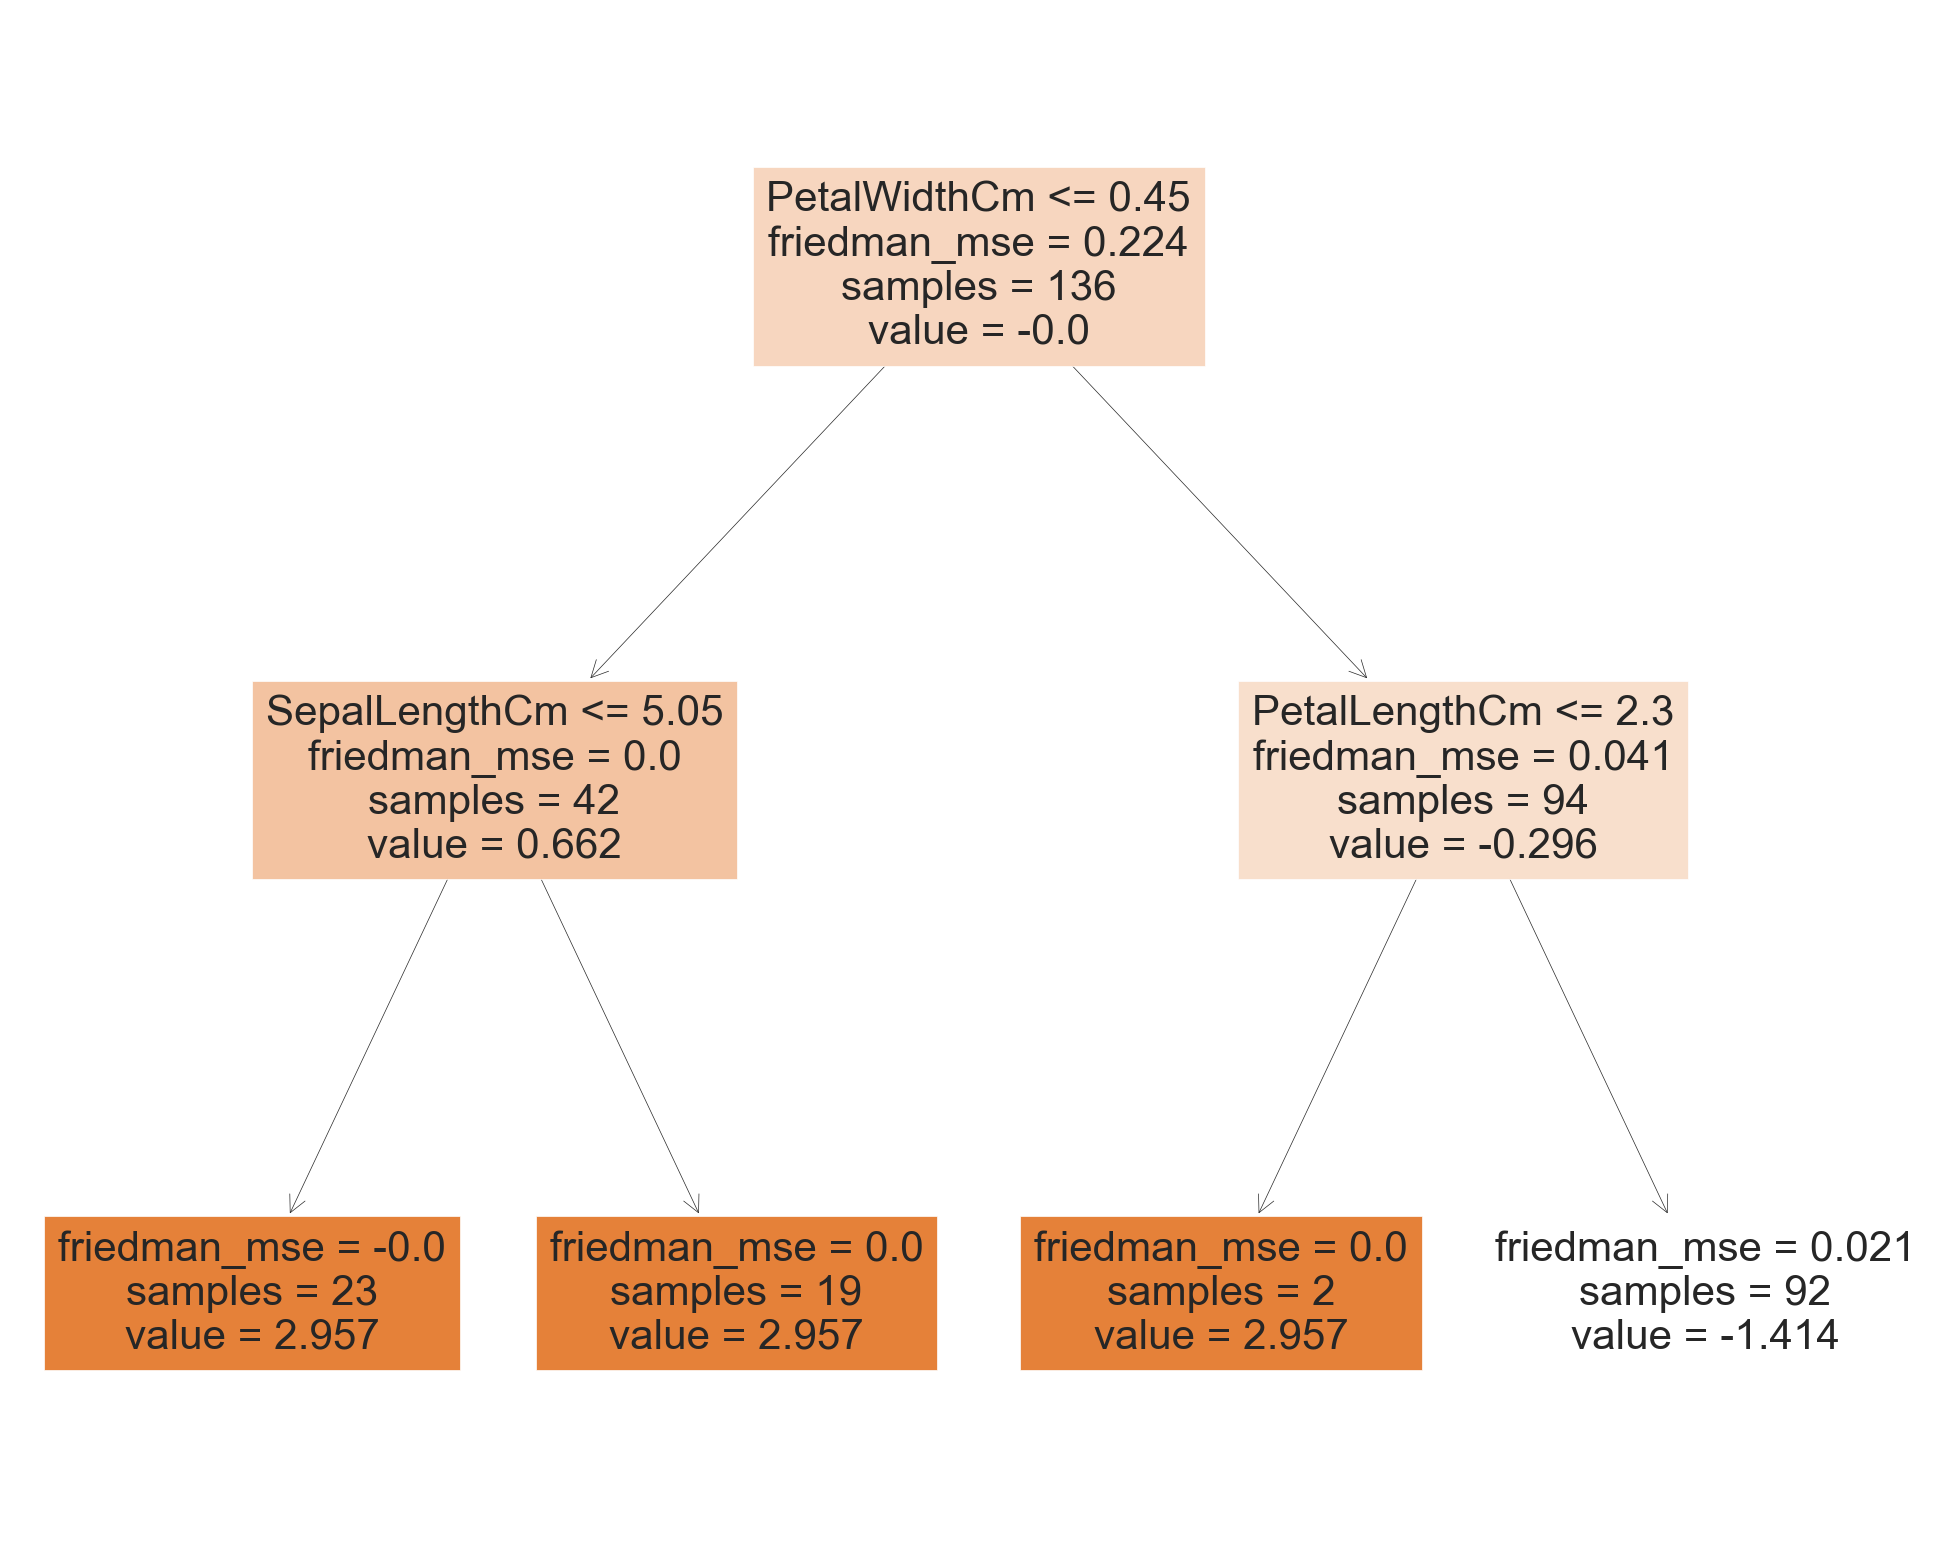

In [63]:
fig = plt.figure(figsize=(25, 20))
tree.plot_tree(gbm.estimators_[0][0],
                feature_names=X.columns.tolist(),  
                class_names=[str(c) for c in y.unique().tolist()],
                filled=True
                )

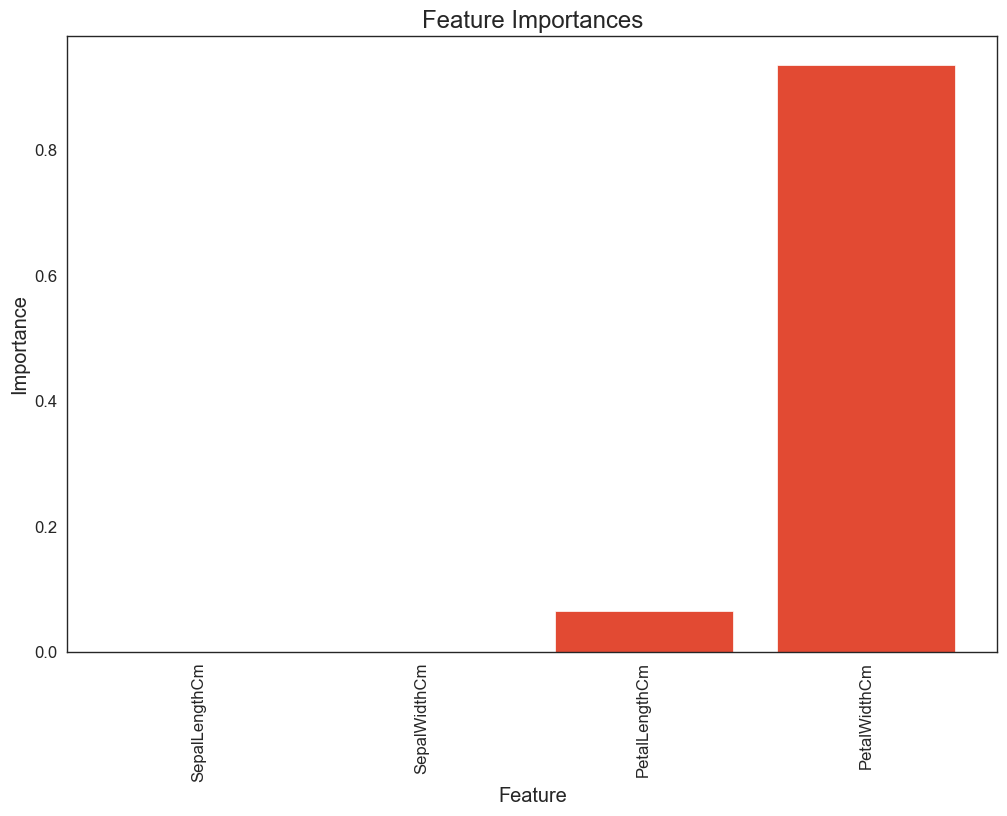

In [64]:
feature_importances = gbm.feature_importances_
feature_names = X_train.columns.tolist()
plt.bar(feature_names, feature_importances)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

By looking at the barchart we can see that the most important feature is `PetalWidthCm`. This is also the feature with the highest correlation with the target variable according to the correlation matrix (0.898). The second most important feature is `PetalLengthCm`, which is also the second highest correlated feature (0.894). If we would want to improve this model, we should remove the `SepalLengthCm` and `SepalWidthCm` features from our feature set. What we could also try is to only use the `PetalWidthCm` features to train our model.

### Compare Binary Classification Models

We will be comparing the models based on the following metrics:
- Cross Validation Score
- ROC AUC

#### Cross Validation Score
1. Decision Tree: 0.91
2. Gradient Boosting Machine (GBM): 0.93

#### ROC AUC
1. Decision Tree: 0.9762
2. Gradient Boosting Machine (GBM): 0.9762

#### Conclusion
The Gradient Boosting Machine (GBM) model is the best model for this dataset. It has the highest cross validation score and while having the same ROC AUC.

## Multi-class or multi-label classification
**Type:** Supervised Learning       
**Goal:** Classify data into one of three or more classes, e.g. classify a set of emails into spam, inbox or phishing classes.

### K-Nearest Neighbors

#### Model Features and Target

In [65]:
X = iris.drop('Species', axis=1)
y = iris['Species']

# split the dataset into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=1)

#### Model Training & Evaluation

In [66]:
# 🤖 prompt: "how do you determine the right amount of neigbours in kNN?"

# to avoid data points with larger scale dominating the distance between data points with smaller scale,
# we scale the features to have zero mean and unit variance (because kNN is a distance-based algorithm)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# train a kNN classifier on the training set using the scaled features and a range of k values
k_values = np.arange(1, 36)
cv_scores = []
for k in k_values:
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clf, X_train_scaled, y_train, cv=5)
    cv_scores.append(np.mean(scores))

# choose the k value that gives the best performance on the validation set
best_k = k_values[np.argmax(cv_scores)]
print('Best k:', best_k)

# train a new kNN classifier on the entire training set using the chosen k value
knn = neighbors.KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_val_scaled)

Best k: 1


In [67]:
# evaluate the performance of the classifier on the test set
X_test_scaled = scaler.transform(X_test)
svm_scores = cross_val_score(knn, X, y, cv=LeaveOneOut())
print("K-Nearest Neighbors Accuracy: %0.2f" % (svm_scores.mean()))

K-Nearest Neighbors Accuracy: 0.93


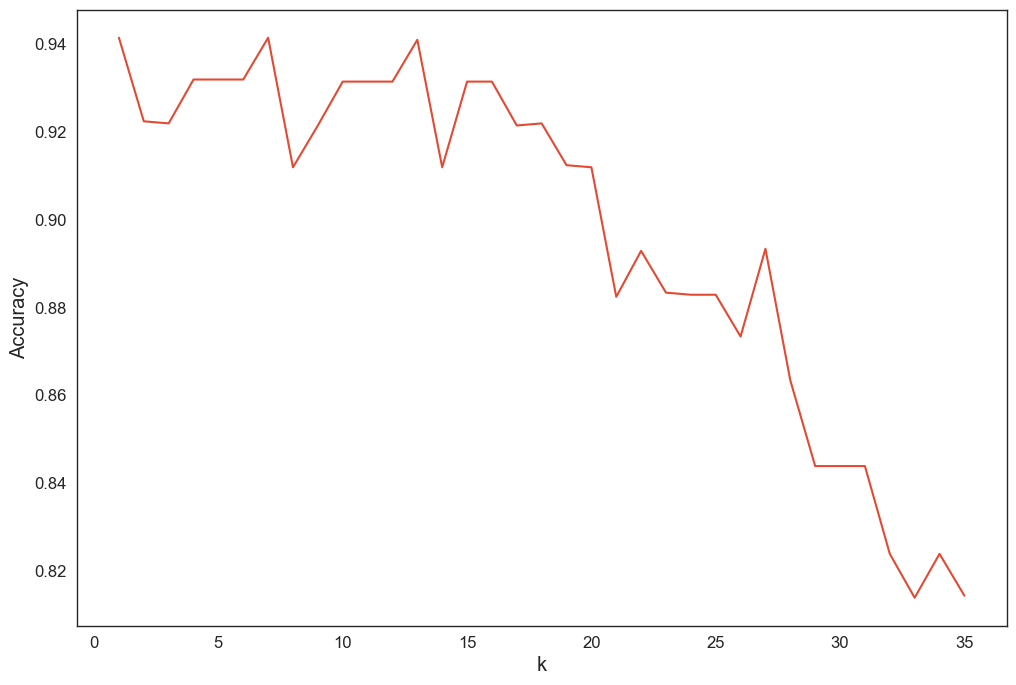

,k,accuracy
0,1,0.941429
1,2,0.922381
2,3,0.921905
3,4,0.931905
4,5,0.931905
5,6,0.931905
6,7,0.941429
7,8,0.911905
8,9,0.921429
9,10,0.931429


In [68]:
# plot the accuracy on the validation set for each k value
plt.plot(k_values, cv_scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

# create pandas DataFrame from the data above
df = pd.DataFrame({'k': k_values, 'accuracy': cv_scores})
df

1. In the plot and table above we can see that 1 and 7 are the best values for k. We will use 1 for our final model, because it is the simplest model. 
2. We can also see that the model is fairly accurate, with a score of 0.94.
3. We can see that the trend is that the score decreases as k increases. This is because the higher the k value, the more you underfit the data, because the model is becoming too simple and does not capture the underlying patterns in the data. This is because a high value of k means that the classifier considers more neighbors when making a prediction, which can lead to a more general model that does not fit the training data well. 

🤖 prompt: does a high k mean overfitting or underfitting, and how can we test this?

In [69]:
classification_rep = classification_report(y_val, y_pred)
print("\nClassification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.78      1.00      0.88         7
           2       0.93      0.93      0.93        14

    accuracy                           0.91        34
   macro avg       0.90      0.92      0.91        34
weighted avg       0.92      0.91      0.91        34



**Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.**   
_precision = TP / float(TP + FP)_
- The 0 value has a precision of 1.00 
- The 1 value has a precision of 0.78
- The 2 value has a precision of 0.93

**Recall is the ratio of correctly predicted positive observations to the all observations in actual class.**   
_recall = TP / float(TP + FN)_
- The 0 value has a recall of 0.92
- The 1 value has a recall of 0.88
- The 2 value has a recall of 0.93

**F1 Score is the weighted average of Precision and Recall.**
- The 0 value has a F1 score of 0.92
- The 1 value has a F1 score of 0.88
- The 2 value has a F1 score of 0.93

### Support Vector Machine

#### Model Features and Target

In [70]:
X = iris.drop('Species', axis=1)
y = iris['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### Model Training

In [71]:
# to avoid data points with larger scale dominating the distance between data points with smaller scale,
# we scale the features to have zero mean and unit variance (because SVM is a distance-based algorithm)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train an SVM classifier on the training set
svm = SVC(kernel='linear', C=1, random_state=1)
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

#### Model Evaluation

In [72]:
# evaluate the performance of the classifier on the test set
svm_scores = cross_val_score(svm, X, y, cv=LeaveOneOut())
print("Support Vector Machine Accuracy: %0.2f" % (svm_scores.mean()))

Support Vector Machine Accuracy: 0.96


In [73]:
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       1.00      1.00      1.00        14
           2       0.86      0.86      0.86         7

    accuracy                           0.94        35
   macro avg       0.93      0.93      0.93        35
weighted avg       0.94      0.94      0.94        35



**Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.**   
_precision = TP / float(TP + FP)_
- The 0 value has a precision of 0.93 
- The 1 value has a precision of 1.00
- The 2 value has a precision of 0.86

**Recall is the ratio of correctly predicted positive observations to the all observations in actual class.**   
_recall = TP / float(TP + FN)_
- The 0 value has a recall of 0.93
- The 1 value has a recall of 1.00

**F1 Score is the weighted average of Precision and Recall.**
- The 0 value has a F1 score of 0.93
- The 1 value has a F1 score of 1.00
- The 2 value has a F1 score of 0.86

### Compare Multi-class Classification Models

We will be comparing the models based on the following metrics:
- Cross Validation Score
- Precision
- Recall
- F1 Score

#### Cross Validation Score
1. K-Nearest Neighbors: 0.93
2. Support Vector Machine: 0.97

#### Precision
1. K-Nearest Neighbors: 0.90
2. Support Vector Machine: 0.93

#### Recall
1. K-Nearest Neighbors: 0.91
2. Support Vector Machine: 0.94

#### F1 Score
1. K-Nearest Neighbors: 0.91
2. Support Vector Machine: 0.94

#### Conclusion
The Support Vector Machine model is the best model for this dataset. It has the highest cross validation score, also it has the highest precision, recall and F1 score.

## Clustering
**Type:** Unsupervised Learning     
**Goal:** Grouping similar data points together, without prior knowledge of the labels or categories

### K means clustering

#### Model Features and Target

In [74]:
X = iris.drop('Species', axis=1)
y = iris['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = .2)

#### Optimizing the number of clusters

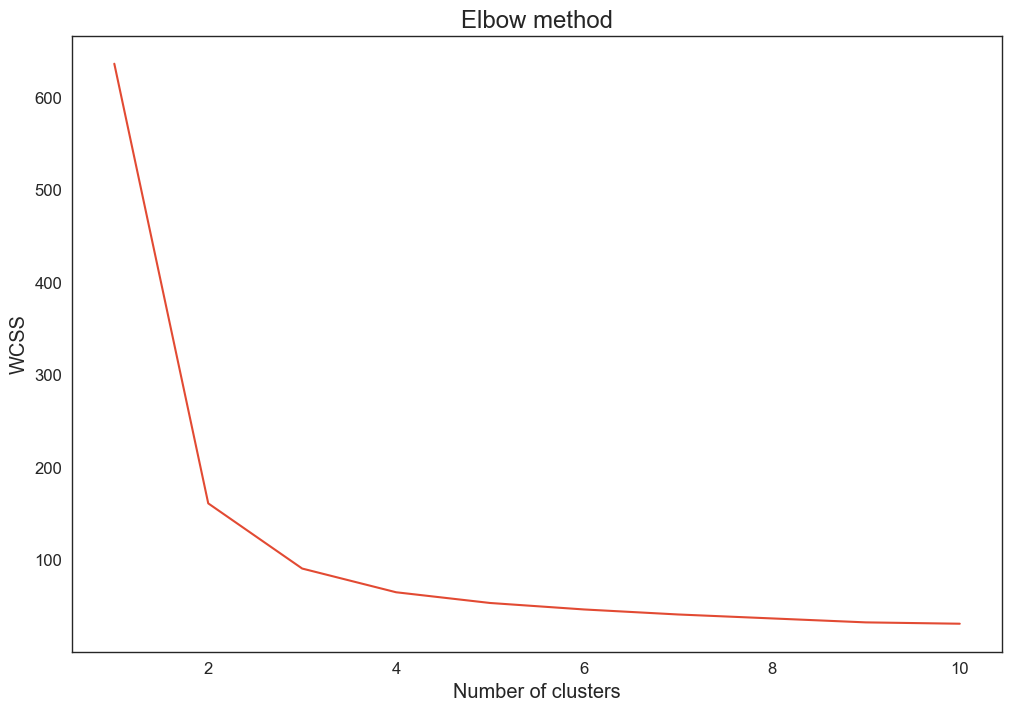

In [75]:
# Compute WCSS from k=1 to k=10
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

# Plot WCSS as a function of k
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow method')
plt.show()

By looking at the plot that has been created by the elbow method, it's hard to tell the elbow point. The elbow point is defined as the point where the the sum of squared distances falls suddenly, and then flattens. We can argue that this happens between point 2 and 3, but it's hard to tell. That's why will also check the silhouette score help us determine the optimal number of clusters.

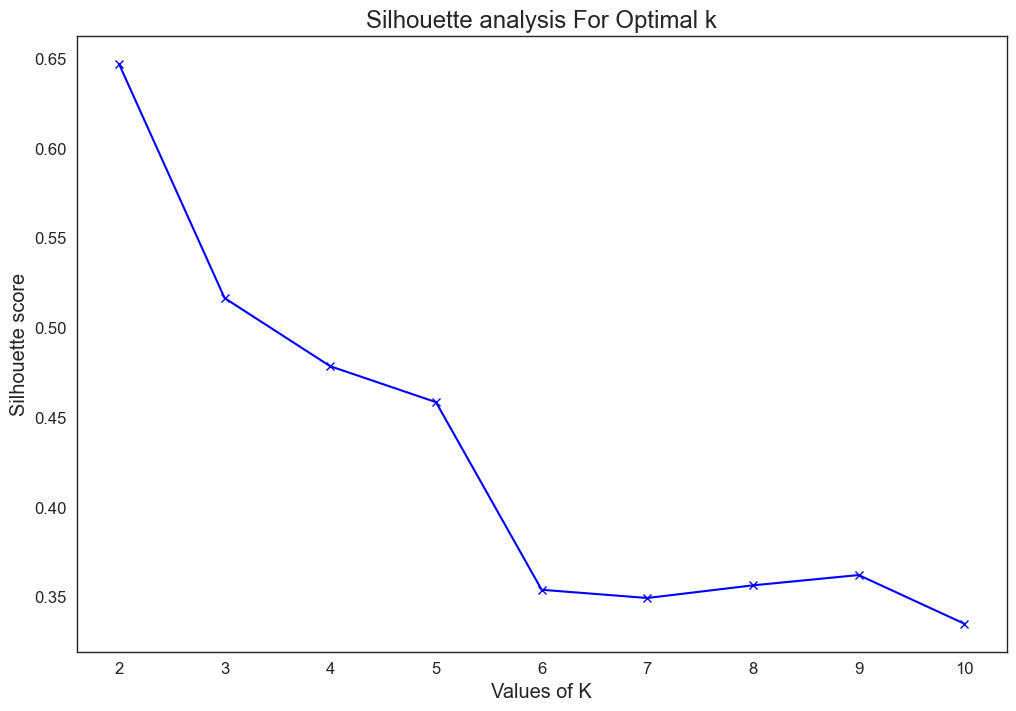

In [76]:
silhouette_avg = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_train)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(X_train, cluster_labels))

plt.plot(range(2, 11), silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

By looking at the plot that has been created by the silhouette score, it's easier to find the optimal number of clusters. The value of the silhouette coefﬁcient is between [-1, 1], a score of 1 denotes the best, meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters. By looking at our graph the optimal number of clusters is 2.

#### Model Training

In [77]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

#### Model Evaluation

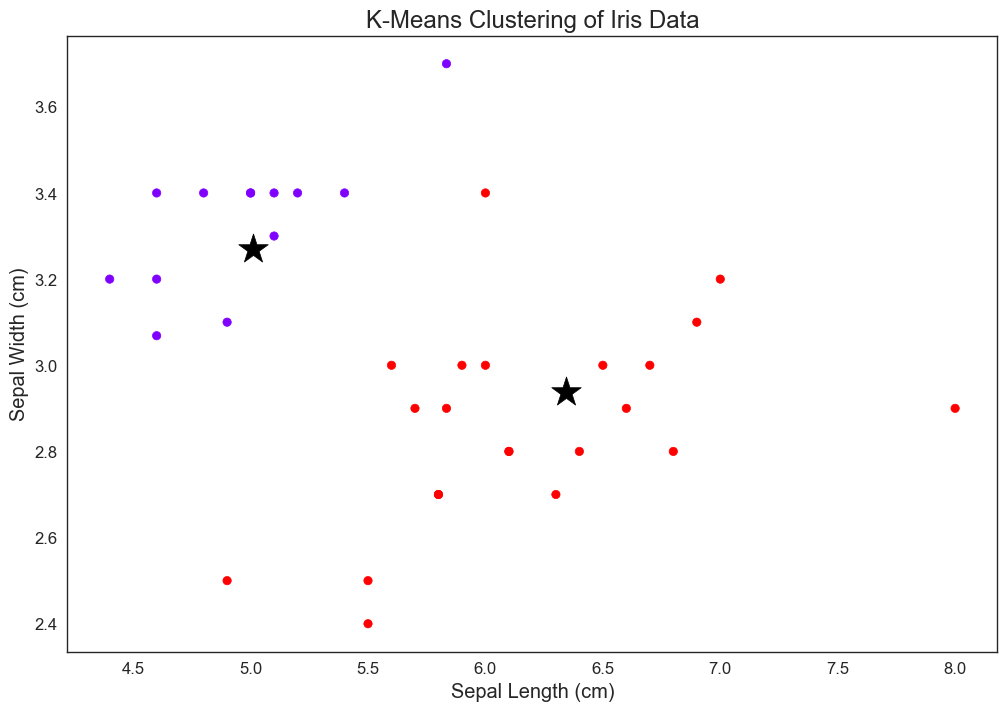

In [78]:
# plot the clusters
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=500, label ="clustercentra", c='black')
plt.title("K-Means Clustering of Iris Data")
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

In [79]:
kmeans_silhouette = max(silhouette_avg)
kmeans_ari = adjusted_rand_score(y_test, y_pred)
kmeans_homogeneity = homogeneity_score(y_test, y_pred)
kmeans_completeness = completeness_score(y_test, y_pred)
kmeans_v_measure = v_measure_score(y_test, y_pred)

kmeans_scores = pd.DataFrame({'Silhouette': [kmeans_silhouette], 'ARI': [kmeans_ari], 'Homogeneity': [kmeans_homogeneity], 'Completeness': [kmeans_completeness], 'V Measure': [kmeans_v_measure]})
kmeans_scores = kmeans_scores.round(4)
kmeans_scores

,Silhouette,ARI,Homogeneity,Completeness,V Measure
0,0.6469,0.5617,0.5278,0.844,0.6495


**Silhouette is a measure of how close each point in a cluster is to the points in its neighboring clusters. It ranges from -1 to 1, where a score of 1 indicates that the object is well-matched to its own cluster and poorly-matched to neighboring clusters, and a score of -1 indicates the opposite.**        
_🤖 prompt: What is the Silhouette score and how can it be read? 1-2 sentences._
- The K Means model has a Silhouette of 0.6469

**ARI (Adjusted Rand Index) is a measure of the similarity between two clusterings, which takes into account chance agreement. It ranges from -1 to 1, where a score of 1 indicates perfect agreement between the two clusterings, and a score of 0 or less indicates no agreement beyond chance.**         
_🤖 prompt: What is ARI and how can it be read? 1-2 sentences._
- The K Means model has a ARI of 0.5617

**Homogeneity is a measure of how similar or uniform the elements in a cluster are. A homogeneity score of 1 signifies perfect uniformity within clusters and complete dissimilarity between clusters, while a score approaching 0 suggests less distinct clustering and higher overlap between cluster elements.**     
_🤖 prompt: What is homogeneity and how can it be read? 1-2 sentences._
- The K Means model has a homogeneity of 0.5278

**Completeness is a measure that gauges whether all data points that belong to the same true class are assigned to the same cluster. It ranges from 0 to 1, where 1 indicates that all points from the same true class are clustered together, while lower scores imply incomplete clustering of related data points.**     
_🤖 prompt: What is completeness and how can it be read? 1-2 sentences._
- The K Means model has a completeness of 0.844

**V-measure is the harmonic mean between homogeneity and completeness. It ranges from 0 to 1, where 1 indicates that the clustering is perfectly complete and homogeneous, while lower scores indicate that clusters are less pure.**       
_🤖 prompt: What is V-measure and how can it be read? 1-2 sentences._
- The K Means model has a V-measure of 0.6495

### DBSCAN

#### Model Features and Target

In [80]:
X = iris.drop('Species', axis=1)
y = iris['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = .2)

#### Model Training

In [81]:
dbs = DBSCAN()
dbs.fit(X_train)
y_pred = dbs.fit_predict(X_test)

#### Model Evaluation

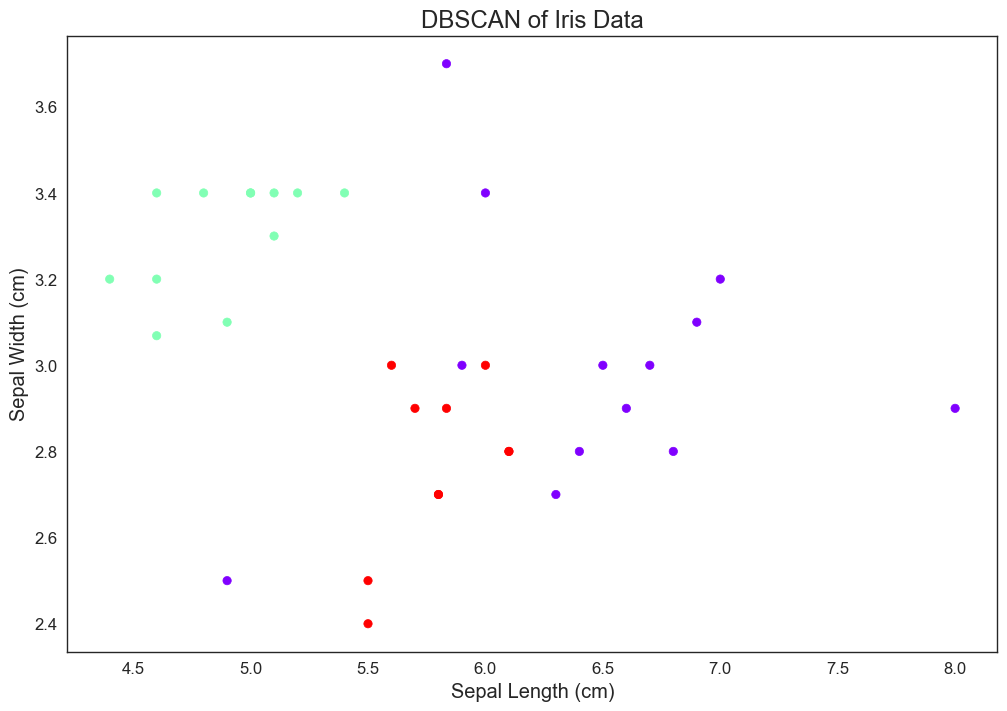

In [82]:
# plot the clusters
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, cmap='rainbow')
plt.title("DBSCAN of Iris Data")
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

In [83]:
dbs_silhouette = silhouette_score(X_test, y_pred)
dbs_ari = adjusted_rand_score(y_test, y_pred)
dbs_homogeneity = homogeneity_score(y_test, y_pred)
dbs_completeness = completeness_score(y_test, y_pred)
dbs_v_measure = v_measure_score(y_test, y_pred)

dbs_scores = pd.DataFrame({'Silhouette': [dbs_silhouette], 'ARI': [dbs_ari], 'Homogeneity': [dbs_homogeneity], 'Completeness': [dbs_completeness], 'V Measure': [dbs_v_measure]})
dbs_scores = dbs_scores.round(4)
dbs_scores

,Silhouette,ARI,Homogeneity,Completeness,V Measure
0,0.4124,0.483,0.5555,0.5363,0.5457


**Silhouette is a measure of how close each point in a cluster is to the points in its neighboring clusters. It ranges from -1 to 1, where a score of 1 indicates that the object is well-matched to its own cluster and poorly-matched to neighboring clusters, and a score of -1 indicates the opposite.**    
_🤖 prompt: What is the Silhouette score and how can it be read? 1-2 sentences._
- The DBSCAN model has a Silhouette of 0.4124

**ARI (Adjusted Rand Index) is a measure of the similarity between two clusterings, which takes into account chance agreement. It ranges from -1 to 1, where a score of 1 indicates perfect agreement between the two clusterings, and a score of 0 or less indicates no agreement beyond chance.**     
_🤖 prompt: What is ARI and how can it be read? 1-2 sentences._
- The DBSCAN model has a ARI of 0.483

**Homogeneity is a measure of how similar or uniform the elements in a cluster are. A homogeneity score of 1 signifies perfect uniformity within clusters and complete dissimilarity between clusters, while a score approaching 0 suggests less distinct clustering and higher overlap between cluster elements.**     
_🤖 prompt: What is homogeneity and how can it be read? 1-2 sentences._
- The DBSCAN model has a homogeneity of 0.5555

**Completeness is a measure that gauges whether all data points that belong to the same true class are assigned to the same cluster. It ranges from 0 to 1, where 1 indicates that all points from the same true class are clustered together, while lower scores imply incomplete clustering of related data points.**     
_🤖 prompt: What is completeness and how can it be read? 1-2 sentences._
- The DBSCAN model has a completeness of 0.5363

**V-measure is the harmonic mean between homogeneity and completeness. It ranges from 0 to 1, where 1 indicates that the clustering is perfectly complete and homogeneous, while lower scores indicate that clusters are less pure.**       
_🤖 prompt: What is V-measure and how can it be read? 1-2 sentences._
- The DBSCAN model has a V-measure of 0.5457

### Compare Clustering Models

In [84]:
scores = pd.concat([kmeans_scores, dbs_scores])
scores.index = ['K-Means', 'DBSCAN']
scores

,Silhouette,ARI,Homogeneity,Completeness,V Measure
K-Means,0.6469,0.5617,0.5278,0.8440,0.6495
DBSCAN,0.4124,0.4830,0.5555,0.5363,0.5457


We will be comparing the models based on the following metrics:
- Silhouette Score
- ARI
- Homogeneity
- Completeness
- V Measure

#### Conclusion
The K-Means model is the best model for this dataset. It has the highest Silhouette Score, ARI, Homogeneity, and while having a lower Completeness it has a higher V Measure (which is the harmonic mean between homogeneity and completeness). The reason DBSCAN is not performing so well could be because our data is not dense enough. DBSCAN is a density-based clustering algorithm, which means that it groups together points that are close to each other based on a distance measurement. The performance of the DBSCAN could improve if we find the most optimal hyperparameters.

## Linear Regression
**Type:** Supervised Learning     
**Goal:** Find the best fit linear relationship between the independent (input) and dependent (output) variables

### Simple Linear Regression

#### Model Features and Target

In [85]:
X = iris['PetalLengthCm'].values.reshape(-1,1)
y = iris['PetalWidthCm'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = .2)

#### Model Training

In [86]:
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

#### Model Evaluation

In [87]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

results = pd.DataFrame([['Linear Regression', mse, r2, mae, evs]], columns=['Model', 'MSE', 'R2', 'MAE', 'EVS'])
results

,Model,MSE,R2,MAE,EVS
0,Linear Regression,0.032622,0.931367,0.140694,0.932309


**MSE is the average squared difference between the estimated values and the actual value.** 
- The simple linear regression model has a MSE of 0.032622

This means that our model has an average squared difference of 0.032622 between the estimated values and the actual value. This is a very low value, which means that our model is very accurate.

**𝐑2 is statistical measure of how close data are to the fitted regression line.**  
- The simple linear regression model has a 𝐑2 of 0.931367
 
This means that our model explains 93.14% of the variability in the dependent variable (PetalWidthCm) by the independent variable (PetalLengthCm).

**MAE is the average of the absolute difference between the predicted values and observed value.**
- The simple linear regression model has a MAE of 0.140694

This means that our model has an average absolute difference of 0.140694 between the predicted values and observed value. This is a very low value, which means that our model is very accurate. 

**EVS is the square of the correlation between the actual and the predicted values.**
- The simple linear regression model has a EVS of 0.932309

This means that our model has a correlation of 93.23% between the actual and the predicted values. This is a very high value, which means that our model is very accurate.

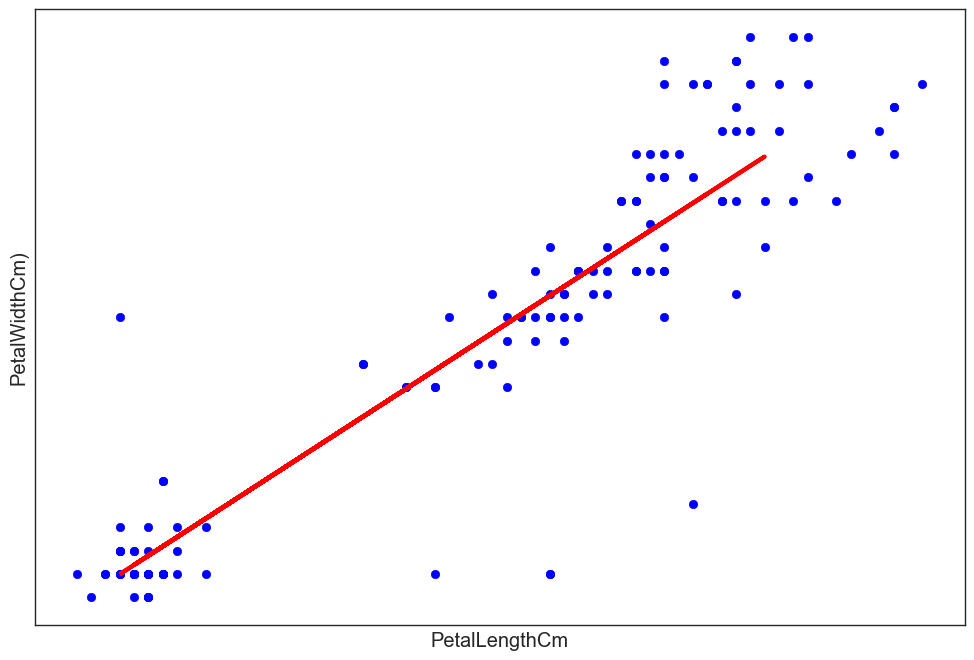

In [88]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm)')

plt.xticks(())
plt.yticks(())
plt.show()

The plot displays a positive linear relationship between the PetalLengthCm and PetalWidthCm. This means that the PetalLengthCm and PetalWidthCm are positively correlated. This is also shown by the correlation matrix, which shows a correlation of 0.926781 between the PetalLengthCm and PetalWidthCm.

### Multiple Linear Regression

#### Model Features and Target

In [89]:
X = iris[['PetalWidthCm', 'SepalLengthCm']]
y = iris['PetalLengthCm']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = .2)

#### Model Training

In [90]:
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

#### Model Evaluation

In [91]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

results = pd.DataFrame([['Linear Regression', mse, r2, mae, evs]], columns=['Model', 'MSE', 'R2', 'MAE', 'EVS'])
results

,Model,MSE,R2,MAE,EVS
0,Linear Regression,0.215715,0.913481,0.339547,0.916501


**MSE is the average squared difference between the estimated values and the actual value.** 
- The simple linear regression model has a MSE of 0.215715

This means that our model has an average squared difference of 0.215715 between the estimated values and the actual value. This is a pretty low value, compared to the simple linear regression model this is a higher value, which means that our model is less accurate. But it's still a low value, which means that our model is still pretty accurate. 

**𝐑2 is statistical measure of how close data are to the fitted regression line.**  
- The simple linear regression model has a 𝐑2 of 0.913481
 
This means that our model explains 91.34% of the variability in the dependent variable (PetalLengthCm) by the independent variables (PetalWidthCm and SepalLengthCm).

**MAE is the average of the absolute difference between the predicted values and observed value.**
- The simple linear regression model has a MAE of 0.339547

This means that our model has an average absolute difference of 0.339547 between the predicted values and observed value. This is a pretty low value, compared to the simple linear regression model this is a higher value, which means that our model is less accurate. But it's still a low value, which means that our model is still pretty accurate. 

**EVS is the square of the correlation between the actual and the predicted values.**
- The simple linear regression model has a EVS of 0.916501

This means that our model has a correlation of 91.65% between the actual and the predicted values. This is a high value, compared to the simple linear regression model this is a slightly lower value, which means that our model is less accurate. But it's still a high value, which means that our model is still pretty accurate. 

Text(0.5, 0, 'PetalLengthCm')

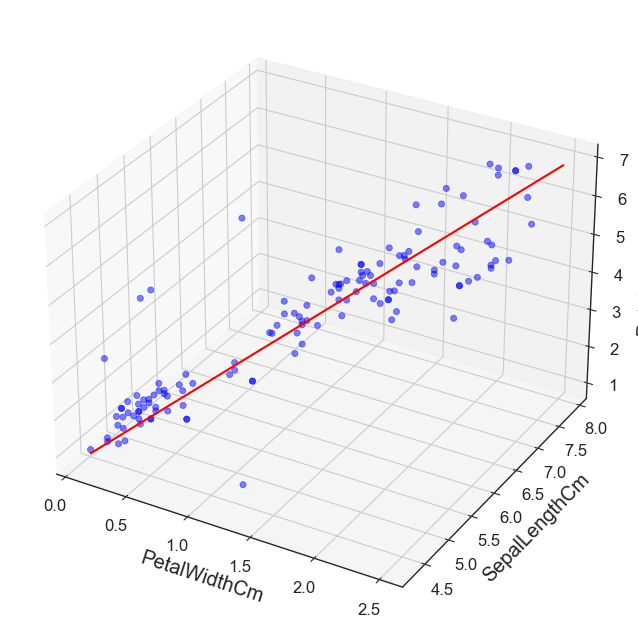

In [92]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train['PetalWidthCm'], X_train['SepalLengthCm'], y_train, c='blue', marker='o', alpha=0.5)


x = np.linspace(X_train['PetalWidthCm'].min(), X_train['PetalWidthCm'].max(), 100)
y = np.linspace(X_train['SepalLengthCm'].min(), X_train['SepalLengthCm'].max(), 100)
z = np.linspace(y_train.min(), y_train.max(), 100)
ax.plot(x, y, z, c='red')

ax.set_xlabel('PetalWidthCm')
ax.set_ylabel('SepalLengthCm')
ax.set_zlabel('PetalLengthCm')

#### Model Validation

In order to validated model we need to check few assumption of linear regression model. The common assumption for Linear Regression model are following

1. Linear Relationship: In linear regression the relationship between the dependent and independent variable to be linear. This can be checked by scatter ploting Actual value Vs Predicted value
2. The residual error plot should be normally distributed.
3. The mean of residual error should be 0 or close to 0 as much as possible
4. The linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.
5. Linear regession assumes that there is little or no Multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. The variance inflation factor VIF* identifies correlation between independent variables and strength of that correlation.  𝐕𝐈𝐅=1/(1- r2)   
If VIF >1 & VIF <5 moderate correlation, VIF < 5 critical level of multicollinearity.
6. Homoscedasticity: The data are homoscedastic meaning the residuals are equal across the regression line. We can look at residual Vs fitted value scatter plot. If heteroscedastic plot would exhibit a funnel shape pattern.

/var/folders/d2/b1g6zx2s0xj74b70lpyzqjlr0000gn/T/ipykernel_7343/4156531298.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred),ax=ax)


11.558123687190452

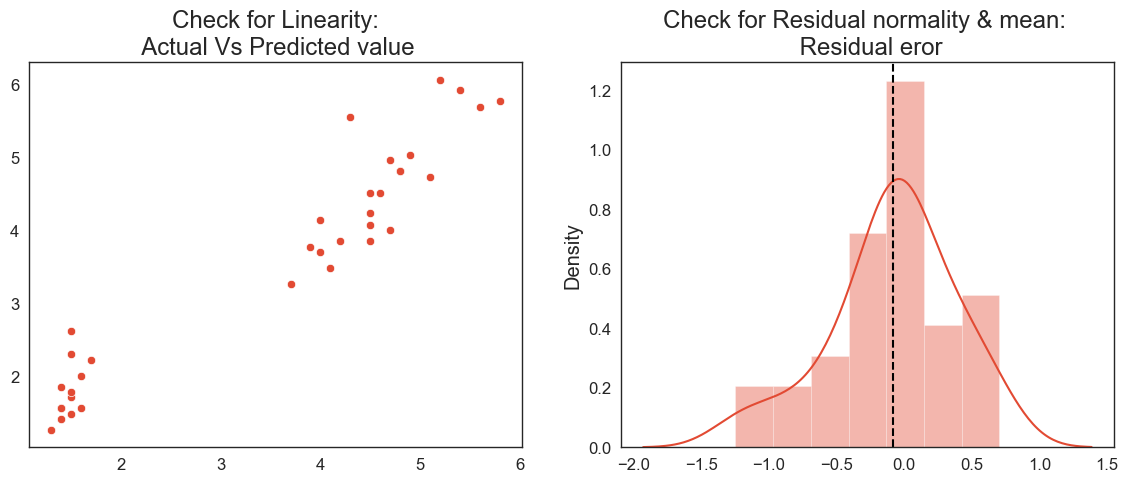

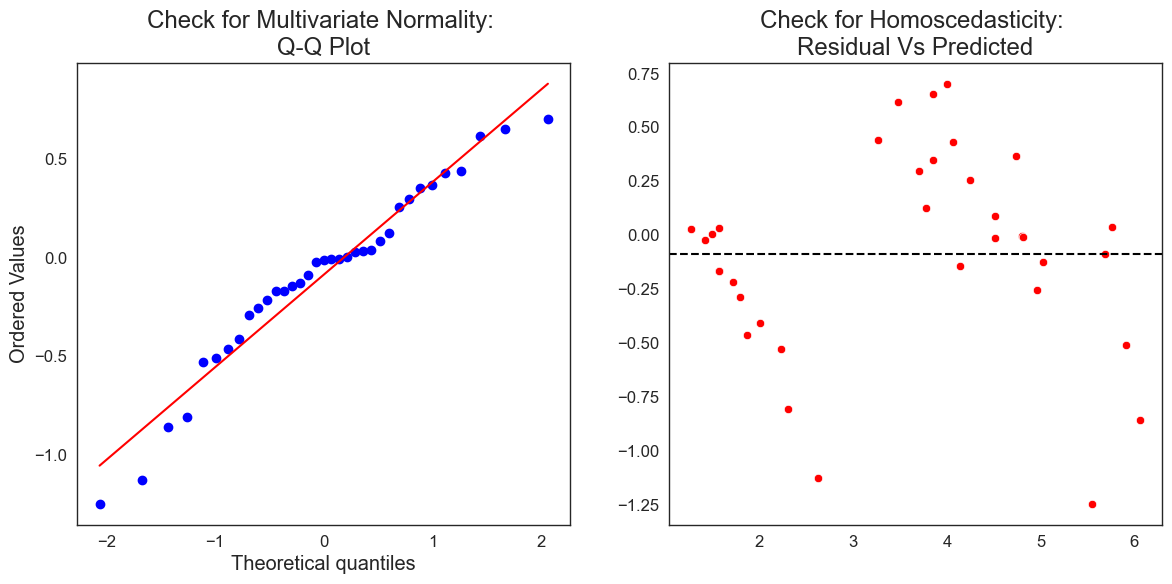

In [93]:
# flatten the data before plotting
y_test = y_test.ravel()
y_pred = y_pred.ravel()

# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax)
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred),ax=ax)
ax.axvline((y_test - y_pred).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred), x= y_pred, ax = ax[1],color='r') 
# add reggression line
ax[1].axhline((y_test - y_pred).mean(),color='k',linestyle='--')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- r2)
VIF

The model assumption linear regression as follows: 
1. In our model the actual vs predicted plot is linear, so the assumption is satisfied.
2. The residual mean is very close to zero and residual error plot is normally distributed, so the assumption is satisfied.
3. The QQ plot shows that the data is normally distributed, so the assumption is satisfied https://condor.depaul.edu/sjost/it223/documents/normal-plot.htm
4. The VIF for all the variables are more than 10, so there is multicollearity in the data, so the assumption is not satisfied https://easystats.github.io/performance/reference/check_collinearity.html#:~:text=A%20VIF%20less%20than%205,model%20predictors%20
5. The residual vs fitted value plot shows that the data is heteroscedastic, because the residuals are not equal across the regression line, so the assumption is not satisfied. https://online.stat.psu.edu/stat501/lesson/4/4.3#:~:text=The%20interpretation%20of%20a%20%22residuals,pattern%20of%20the%20other%20residuals.

### Compare Linear Regression Models

We will be comparing the models based on the following metrics:
- MSE
- 𝐑2
- MAE
- EVS

#### MSE
1. Multiple Linear Regression: 0.215715
2. Simple Linear Regression: 0.032622

#### 𝐑2
1. Multiple Linear Regression: 0.913481
2. Simple Linear Regression: 0.931367

#### MAE
1. Multiple Linear Regression: 0.339547
2. Simple Linear Regression: 0.140694

#### EVS
1. Multiple Linear Regression: 0.916501
2. Simple Linear Regression: 0.932309

#### Conclusion
The Simple Linear Regression model is the best model for this dataset. It has the lowest MSE, the highest 𝐑2, the lowest MAE and the highest EVS. Meaning that it has the lowest average squared difference between the estimated values and the actual value, it explains the most of the variability in the dependent variable by the independent variable, it has the lowest average absolute difference between the predicted values and observed value and it has the highest correlation between the actual and the predicted values.